In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import re

In [2]:
file = './data_cleaned.csv'
data = pd.read_csv(file)

In [3]:
data.head()

,Unnamed: 0,advertiser,industry,job_category,job_description,job_title,job_type,link,location,posting_date,search_word,sub_location,salary_cleaned,job_categorised,industry_categorised
0,0,Ambition Technology,Information & Communication Technology,Engineering - Software,"Our client, a Major Australian University are ...",Senior Data Engineer,Full Time,https://www.seek.com.au/job/39024106?type=stan...,Brisbane,15 May 2019,data scientist,CBD & Inner Suburbs,120000.0,seinor data engineer,technology
1,1,Randstad - Technologies,Information & Communication Technology,Database Development & Administration,The Data Engineer (Cloud/Data Lake) will play ...,Data Engineer - Cloud / Data Lake,Full Time,https://www.seek.com.au/job/39015517?type=stan...,Brisbane,14 May 2019,data scientist,CBD & Inner Suburbs,111526.0,data engineer,technology
2,2,PRA,Information & Communication Technology,Consultants,Brisbane CBD location - Permanent full time ro...,Data Engineer,Full Time,https://www.seek.com.au/job/38998989?type=stan...,Brisbane,11 May 2019,data scientist,CBD & Inner Suburbs,111526.0,data engineer,technology
3,3,Synergy Placements,Information & Communication Technology,Developers/Programmers,Contract role Large QLD organisation Brisbane...,Data Engineer Brisbane,Contract/Temp,https://www.seek.com.au/job/38957267?type=stan...,Brisbane,7 May 2019,data scientist,CBD & Inner Suburbs,208000.0,data engineer,technology
4,4,GRIT Talent Consulting,Information & Communication Technology,Database Development & Administration,We are seeking an experienced Data Engineer fo...,Data Engineer,Contract/Temp,https://www.seek.com.au/job/38943938?type=stan...,Brisbane,3 May 2019,data scientist,NaN,208000.0,data engineer,technology


In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

C:\Users\Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


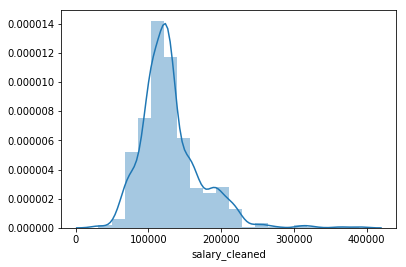

In [5]:
sns.distplot(data.salary_cleaned,bins=20)

Looking at salary, it looks like our average is around $120,000 - $130,000 with a slight positive skew.

Next, let's have a look at the financie and technology industries seperately.

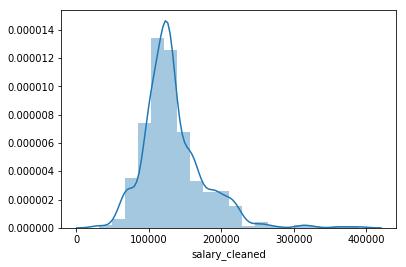

In [6]:
sns.distplot(data[data['industry_categorised'] == 'technology'].salary_cleaned,bins=20)

The salary for technology is almost identical to the overall salary distribution. This makes sense as most of our data is for the technology industry.

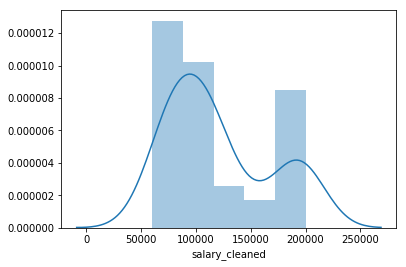

In [7]:
sns.distplot(data[data['industry_categorised'] == 'finance'].salary_cleaned,bins=5)

With finance, it looks bi-modal although this may be due to the way the salaries were imputed. Most of the salaries seem to be concentrated around just below $100,000

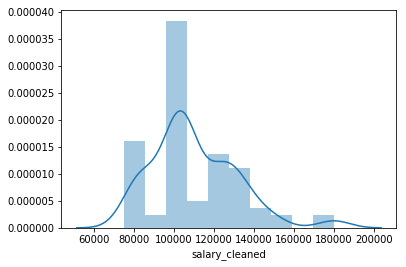

In [8]:
sns.distplot(data[data['industry_categorised'] == 'other'].salary_cleaned,bins=10)

As with the Finance, the salaries seemed to be centered around $100,000 and is positively skewed.

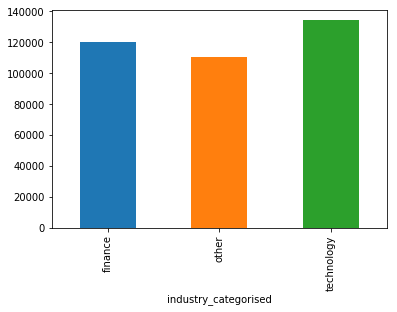

In [9]:
data.groupby('industry_categorised').salary_cleaned.mean().plot(kind='bar')

In [10]:
stats.ttest_ind(data[data['industry_categorised']=='technology'].salary_cleaned,data[data['industry_categorised']=='finance'].salary_cleaned)

Ttest_indResult(statistic=2.000166021293857, pvalue=0.04595379854052448)

H_0: The average salary is the same for technology and finance industries.
H_0: mu_technology - mu_finance = 0

H_A: The average salary is different for technology and finance industries.
H_A: mu_technology - mu_finance != 0

We will use an alpha of 0.05.

The result of our test is a P-value is lower than 0.05. That is, at a 95% confidence level, we reject our null hypothesis that the average salary for technology and finance industries are the same.

In [11]:
stats.ttest_ind(data[data['industry_categorised']=='other'].salary_cleaned,data[data['industry_categorised']=='finance'].salary_cleaned)

Ttest_indResult(statistic=-1.5973334949259548, pvalue=0.11288876674817365)

H_0: The average salary is the same for technology and finance industries.
H_0: mu_other - mu_finance = 0

H_A: The average salary is different for technology and finance industries.
H_A: mu_other - mu_finance != 0

We will use an alpha of 0.05.

The result of our test is a P-value is higher than 0.05. That is, at a 95% confidence level, we fail to reject our null hypothesis that the average salary for other and finance industries are the same.

Looking at the average salary for the 3 industries, technology was the highest, followed by finance, followed by the remaining industries grouped together.

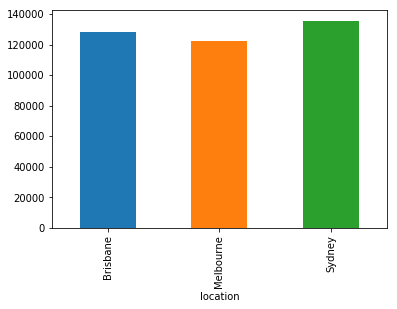

In [12]:
data.groupby('location').salary_cleaned.mean().plot(kind='bar')

In [13]:
stats.ttest_ind(data[data['location']=='Sydney'].salary_cleaned,data[data['location']=='Brisbane'].salary_cleaned)

Ttest_indResult(statistic=1.1181973273003194, pvalue=0.2641203752882583)

H_0: The average salary is the same for Sydney and Brisbane.
H_0: mu_Sydney - mu_Brisbane = 0

H_A: The average salary is different for Sydney and Brisbane.
H_A: mu_Sydney - mu_Brisbane != 0

We will use an alpha of 0.05.

The result of our test is a P-value is higher than 0.05. That is, at a 95% confidence level, we fail to reject our null hypothesis that the average salary for Sydney and Brisbane is the same.

In [14]:
stats.ttest_ind(data[data['location']=='Melbourne'].salary_cleaned,data[data['location']=='Brisbane'].salary_cleaned)

Ttest_indResult(statistic=-1.1532027942409582, pvalue=0.24979679902798024)

In [19]:
stats.ttest_ind(data[data['location']=='Sydney'].salary_cleaned,data[data['location']=='Melbourne'].salary_cleaned)

Ttest_indResult(statistic=3.6263181739592145, pvalue=0.00031223134957257786)

H_0: The average salary is the same for Melbourne and Brisbane.
H_0: mu_Melbourne - mu_Brisbane = 0

H_A: The average salary is different for Melbourne and Brisbane.
H_A: mu_Melbourne - mu_Brisbane != 0

We will use an alpha of 0.05.

The result of our test is a P-value is higher than 0.05. That is, at a 95% confidence level, we fail to reject our null hypothesis that the average salary for Melbourne and Brisbane is the same.

Grouping by location, Sydney had the highest average salary, followed by Brisbane and Melbourne coming in last.

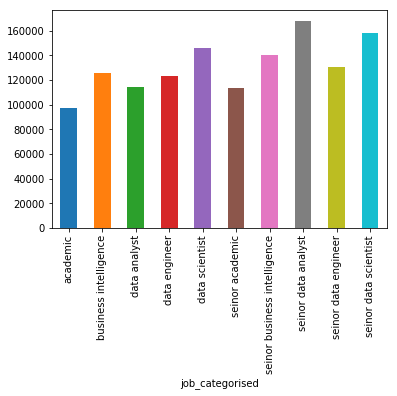

In [15]:
data.groupby('job_categorised').salary_cleaned.mean().plot(kind='bar')

Looking at mean salary across different job categories. As expected Senior roles paid higher. Of the senior roles, data analysts seems to pay the highest on average, followed by data scientists.

Academic roles were paid the lowest overall. If we are not looking at senior roles, out of data analyst, data engineer and data scientists, data scientist pay looks to be the highest on average.

In [16]:
data.groupby(['job_categorised','job_type']).salary_cleaned.describe()

count           mean  \
job_categorised              job_type                                
academic                     Full Time          4.0   97536.500000   
business intelligence        Contract/Temp     18.0  154066.666667   
                             Full Time         48.0  114797.604167   
data analyst                 Contract/Temp     91.0  131553.516484   
                             Full Time        115.0  100464.034783   
data engineer                Casual/Vacation    1.0  120000.000000   
                             Contract/Temp     44.0  157938.181818   
                             Full Time         73.0  102391.342466   
data scientist               Contract/Temp     23.0  175217.391304   
                             Full Time         49.0  132779.561224   
seinor academic              Contract/Temp      1.0  113338.000000   
                             Full Time          4.0  113338.000000   
seinor business intelligence Contract/Temp     21.0  157495.238095   
                             Full Time         38.0  130789.473684   
seinor data analyst          Casual/Vacation    1.0  170000.000000   
                             Contract/Temp     15.0  218253.333333   
                             Full Time         35.0  146738.942857   
seinor data engineer         Contract/Temp      4.0  164000.000000   
                             Full Time         30.0  126000.000000   
seinor data scientist        Contract/Temp      7.0  229428.571429   
                             Full Time         30.0  141135.766667   

                                                       std       min  \
job_categorised              job_type                                  
academic                     Full Time         4896.251934   91188.0   
business intelligence        Contract/Temp    50485.734735   31200.0   
                             Full Time        11965.122142   84000.0   
data analyst                 Contract/Temp    22778.829996   60000.0   
                             Full Time        19682.883989   60000.0   
data engineer                Casual/Vacation           NaN  120000.0   
                             Contract/Temp    47485.771248   31200.0   
                             Full Time        31285.233634   57000.0   
data scientist               Contract/Temp    47488.713034   78000.0   
                             Full Time        42176.019290   90000.0   
seinor academic              Contract/Temp             NaN  113338.0   
                             Full Time            0.000000  113338.0   
seinor business intelligence Contract/Temp    46881.472632  100000.0   
                             Full Time        24294.819707  100000.0   
seinor data analyst          Casual/Vacation           NaN  170000.0   
                             Contract/Temp    45388.700083  170000.0   
                             Full Time        37342.971418   81870.0   
seinor data engineer         Contract/Temp    50806.823689  120000.0   
                             Full Time        12757.688689   90000.0   
seinor data scientist        Contract/Temp    76979.666456  130000.0   
                             Full Time        28107.679850   84667.0   

                                                    25%       50%        75%  \
job_categorised              job_type                                          
academic                     Full Time         95699.25   97969.0   99806.25   
business intelligence        Contract/Temp    115000.00  175500.0  195000.00   
                             Full Time        110000.00  115000.0  120000.00   
data analyst                 Contract/Temp    127400.00  130000.0  156000.00   
                             Full Time         86575.50  100000.0  100000.00   
data engineer                Casual/Vacation  120000.00  120000.0  120000.00   
                             Contract/Temp    104000.00  188500.0  188500.00   
                             Full Time         70000.00  1

In [17]:
data.groupby(['location','sub_location']).salary_cleaned.median()

location   sub_location                       
Brisbane   Bayside & Eastern Suburbs              109720.0
           CBD & Inner Suburbs                    127400.0
           Northern Suburbs                       130000.0
           Southern Suburbs & Logan               131560.0
Melbourne  Bayside & South Eastern Suburbs        115000.0
           CBD & Inner Suburbs                    117500.0
           Eastern Suburbs                        110000.0
           Northern Suburbs                       110000.0
           Western Suburbs                         83151.0
Sydney     CBD, Inner West & Eastern Suburbs      120000.0
           North Shore & Northern Beaches         116756.5
           North West & Hills District            130000.0
           Parramatta & Western Suburbs           130000.0
           Ryde & Macquarie Park                  120000.0
           South West & M5 Corridor                80000.0
           Southern Suburbs & Sutherland Shire    138000.0
Name: sal

Exploring different suburbs for the 3 different cities, there appeared to be some suburbs where salaries offered were significantly lower in all three cities (South West for Sdyney, Western suburbs in Melbourne and Bayside/Eastern Suburbs for Brisbane). However the differences between other areas of each of the 3 cities seemed to be significantly lower.

The lowest paying "sub location"  was South West / MS Corridor in Sydney when comparing all locations, followed by Western Suburbs in Melbourne.

The highest paying suburt is surprisingly Southern Suburbs and Sutherland Shire in Sydney - We would have expected this to be either the CBD or North Shore.


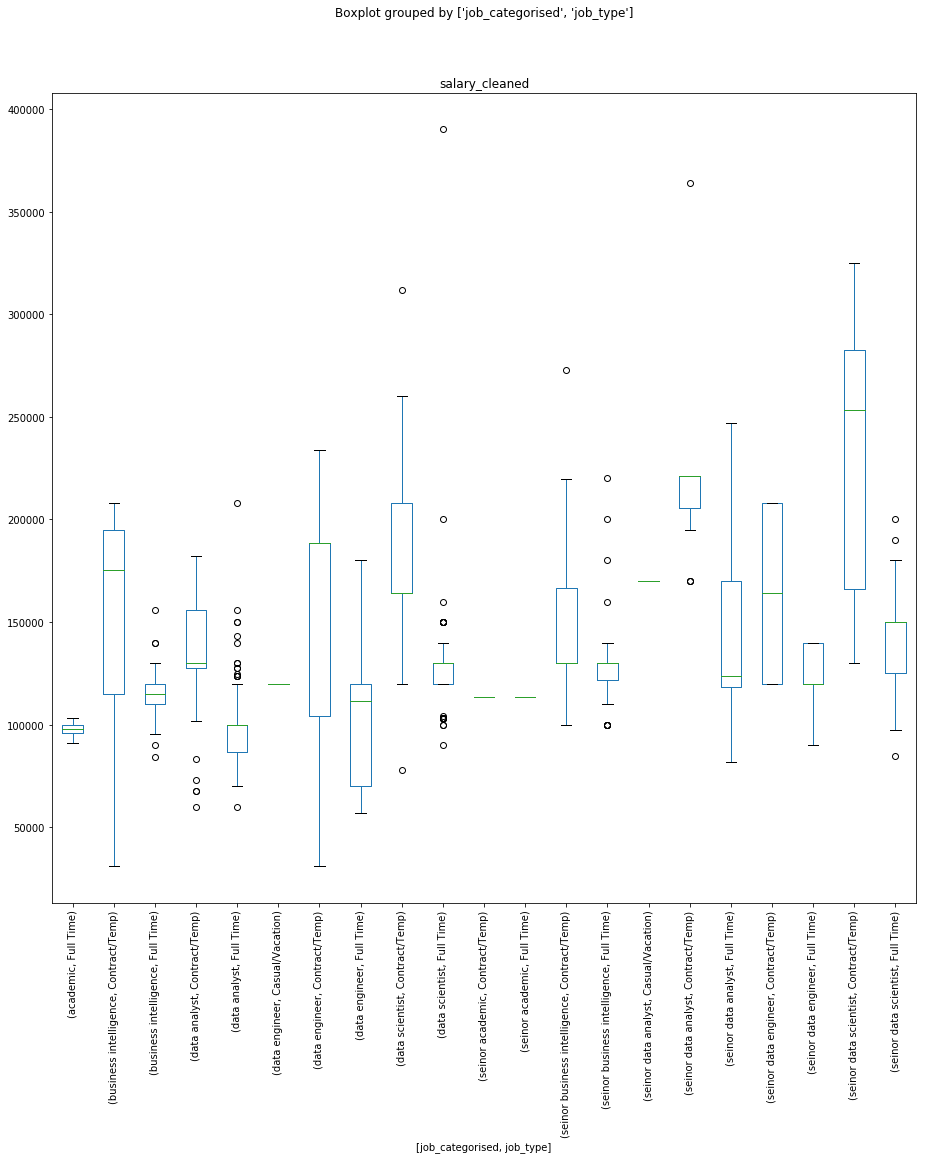

In [18]:
data.boxplot(column='salary_cleaned', by=['job_categorised','job_type'], figsize=(15,15),rot=90,grid=False)

Lastly, we have a look at a box plot broken down by job categories and job types.

We notice that most of the outliars tend to be from the higher end of the salary scale. This is expected considering Salary was positively skewed as shown in our first graph.
The Exception to this pattern was Contract Data Analyst roles and Fulltime Data Scientist roles.

Contract Business Intelligence, Contract Data Engineer and Contract Senior Data Scientist had the wides ranges in terms of annual salary. As a matter of fact, it looks like contract roles did exhibit higher bigger ranges of salary compared to full time roles on average.